In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib as mlp
import plotly.express as px
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
sns.set(font_scale=1.5)

plt.style.use('ggplot')

from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 8,4

In [18]:
air = pd.read_csv("../data/air_quality_Nov2017.csv")

Data cleaning

In [19]:
#clean columns function
def clean_columns(dataframe):
    for column in dataframe:
        dataframe.rename(columns = {column : column.lower().replace(" ", "_")},
                        inplace = 1)
    return dataframe

In [20]:
#clean columns
air = clean_columns(air)

In [26]:
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2853 entries, 1 to 5743
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station       2853 non-null   object 
 1   air_quality   2853 non-null   object 
 2   longitude     2853 non-null   float64
 3   latitude      2853 non-null   float64
 4   o3_hour       2853 non-null   object 
 5   o3_quality    2853 non-null   object 
 6   o3_value      2853 non-null   float64
 7   no2_hour      2853 non-null   object 
 8   no2_quality   2853 non-null   object 
 9   no2_value     2853 non-null   float64
 10  pm10_hour     2853 non-null   object 
 11  pm10_quality  2853 non-null   object 
 12  pm10_value    2853 non-null   float64
 13  generated     2853 non-null   object 
 14  date_time     2853 non-null   int64  
dtypes: float64(5), int64(1), object(9)
memory usage: 356.6+ KB


In [25]:
air.isnull().sum()

station         0
air_quality     0
longitude       0
latitude        0
o3_hour         0
o3_quality      0
o3_value        0
no2_hour        0
no2_quality     0
no2_value       0
pm10_hour       0
pm10_quality    0
pm10_value      0
generated       0
date_time       0
dtype: int64

In [24]:
#drop rows with missing values
air = air.dropna()

In [14]:
# air.dropna(axis=1, thresh=5000, inplace=True)
#drop column setting thershold of at least 5000 real values

In [27]:
air.isnull().sum()

station         0
air_quality     0
longitude       0
latitude        0
o3_hour         0
o3_quality      0
o3_value        0
no2_hour        0
no2_quality     0
no2_value       0
pm10_hour       0
pm10_quality    0
pm10_value      0
generated       0
date_time       0
dtype: int64

In [103]:
air.head(20)

,station,air_quality,longitude,latitude,o3_hour,o3_quality,o3_value,no2_hour,no2_quality,no2_value,pm10_hour,pm10_quality,pm10_value,generated,date_time
1,Eixample,Moderate,2.1538,41.3853,0h,Good,1.0,0h,Moderate,113.0,0h,Good,36.0,01/11/2018 0:00,2018-10-31 23:05:04
5,Palau Reial,Good,2.1151,41.3875,23h,Good,11.0,23h,Good,57.0,23h,Good,23.0,01/11/2018 0:00,2018-10-31 23:05:04
7,Observ Fabra,Good,2.1239,41.4183,23h,Good,58.0,23h,Good,3.0,23h,Good,25.0,01/11/2018 0:00,2018-10-31 23:05:04
9,Eixample,Good,2.1538,41.3853,0h,Good,6.0,0h,Good,80.0,1h,Good,35.0,01/11/2018 1:00,2018-11-01 00:05:25
13,Palau Reial,Good,2.1151,41.3875,0h,Good,27.0,0h,Good,38.0,1h,Good,24.0,01/11/2018 1:00,2018-11-01 00:05:25
15,Observ Fabra,Good,2.1239,41.4183,0h,Good,87.0,0h,Good,8.0,1h,Good,25.0,01/11/2018 1:00,2018-11-01 00:05:25
17,Eixample,Good,2.1538,41.3853,1h,Good,14.0,1h,Good,64.0,1h,Good,34.0,01/11/2018 2:00,2018-11-01 01:05:03
21,Palau Reial,Good,2.1151,41.3875,1h,Good,34.0,1h,Good,28.0,2h,Good,24.0,01/11/2018 2:00,2018-11-01 01:05:03
23,Observ Fabra,Good,2.1239,41.4183,1h,Good,77.0,1h,Good,11.0,2h,Good,25.0,01/11/2018 2:00,2018-11-01 01:05:03
25,Eixample,Good,2.1538,41.3853,2h,Good,32.0,2h,Good,44.0,3h,Good,35.0,01/11/2018 3:00,2018-11-01 02:05:02


In [31]:
air.station.unique()

array(['Eixample', 'Palau Reial', 'Observ Fabra', 'Vall Hebron', 'Gràcia'],
      dtype=object)

In [29]:
def rename_stations(dataframe):
    for station in dataframe.station.unique():
        dataframe.loc[dataframe.station == station, "station"] = station[12:]
    return dataframe

In [30]:
#rename stations to exclude spaces
rename_stations(air)

,station,air_quality,longitude,latitude,o3_hour,o3_quality,o3_value,no2_hour,no2_quality,no2_value,pm10_hour,pm10_quality,pm10_value,generated,date_time
1,Eixample,Moderate,2.1538,41.3853,0h,Good,1.0,0h,Moderate,113.0,0h,Good,36.0,01/11/2018 0:00,1541027104
5,Palau Reial,Good,2.1151,41.3875,23h,Good,11.0,23h,Good,57.0,23h,Good,23.0,01/11/2018 0:00,1541027104
7,Observ Fabra,Good,2.1239,41.4183,23h,Good,58.0,23h,Good,3.0,23h,Good,25.0,01/11/2018 0:00,1541027104
9,Eixample,Good,2.1538,41.3853,0h,Good,6.0,0h,Good,80.0,1h,Good,35.0,01/11/2018 1:00,1541030725
13,Palau Reial,Good,2.1151,41.3875,0h,Good,27.0,0h,Good,38.0,1h,Good,24.0,01/11/2018 1:00,1541030725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5735,Observ Fabra,Good,2.1239,41.4183,21h,Good,60.0,21h,Good,23.0,21h,Good,12.0,30/11/2018 22:00,1543611902
5738,Gràcia,Good,2.1534,41.3987,22h,Good,8.0,22h,Good,65.0,22h,Good,22.0,30/11/2018 23:00,1543615502
5740,Vall Hebron,Good,2.1480,41.4261,22h,Good,32.0,22h,Good,31.0,22h,Good,21.0,30/11/2018 23:00,1543615502
5741,Palau Reial,Good,2.1151,41.3875,22h,Good,40.0,22h,Good,20.0,22h,Good,15.0,30/11/2018 23:00,1543615502


In [11]:
# check column type
air.date_time.dtypes

dtype('int64')

In [32]:
#convert date_time to datetime
air['date_time'] = pd.to_datetime(air['date_time'],unit='s')
air.date_time.dtypes

dtype('<M8[ns]')

In [33]:
air.air_quality.unique()
#original dataset HAD 3 types of air quality including '--' which are all nas

array(['Moderate', 'Good'], dtype=object)

In [194]:
# air[air.air_quality == '--'].describe()
#air quality == '--' are NaN in no2_value

,longitude,latitude,no2_value
count,161.000000,161.000000,0.0
mean,2.153420,7754.665149,NaN
std,0.024387,56151.261748,NaN
min,2.115100,41.378800,NaN
25%,2.133100,41.378800,NaN
50%,2.153400,41.398700,NaN
75%,2.153400,41.398700,NaN
max,2.204500,413987.000000,NaN


In [34]:
air.air_quality.describe()

count     2853
unique       2
top       Good
freq      2754
Name: air_quality, dtype: object

In [195]:
# air.drop(air.index[air['air_quality'] == '--'], inplace = True)

In [13]:
air.no2_quality.unique()

array(['Good', 'Moderate', '--', nan], dtype=object)

In [38]:
air.pm10_quality.unique()

array(['Good', 'Moderate'], dtype=object)

In [39]:
air.o3_quality.unique()
#o3 has no 'moderate' entries

array(['Good'], dtype=object)

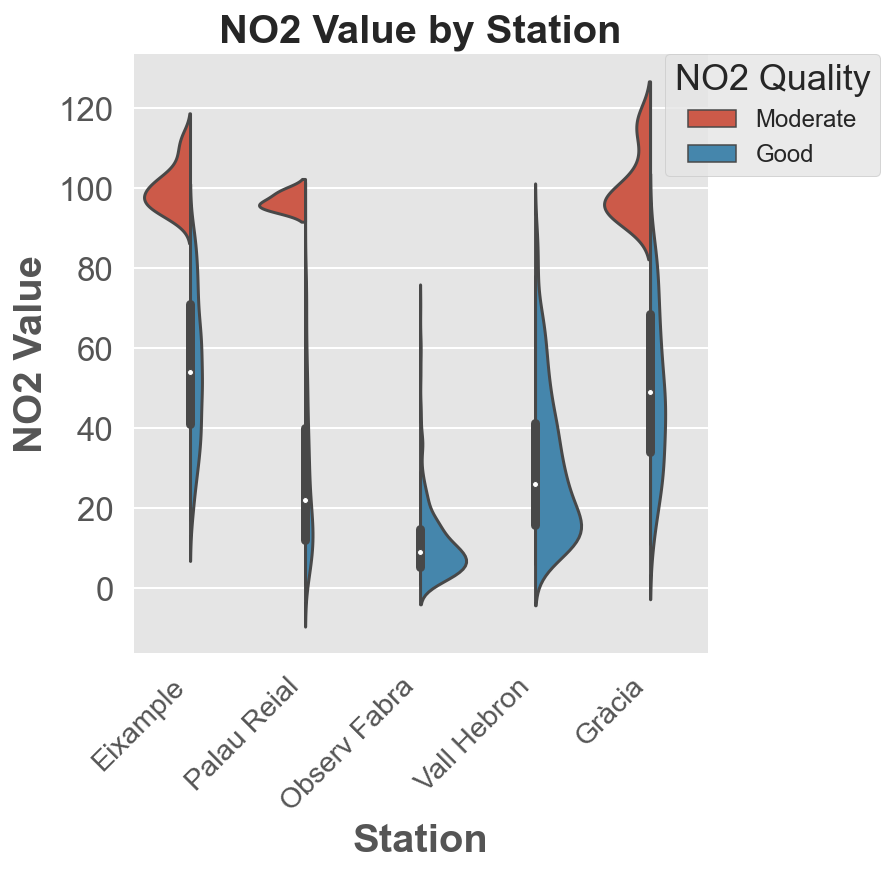

In [84]:
#NO2 Value and Quality per Station
sns.catplot(x="station", y="no2_value", data=air, hue='no2_quality', kind='violin', split=True, legend=False)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
#label axes
plt.xlabel('Station', fontsize=20, fontweight='bold')
plt.ylabel('NO2 Value', fontsize=20, fontweight='bold')
plt.title('NO2 Value by Station', fontsize=20, fontweight='bold')
#label legend
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), borderaxespad=0., fontsize=12).set_title('NO2 Quality')




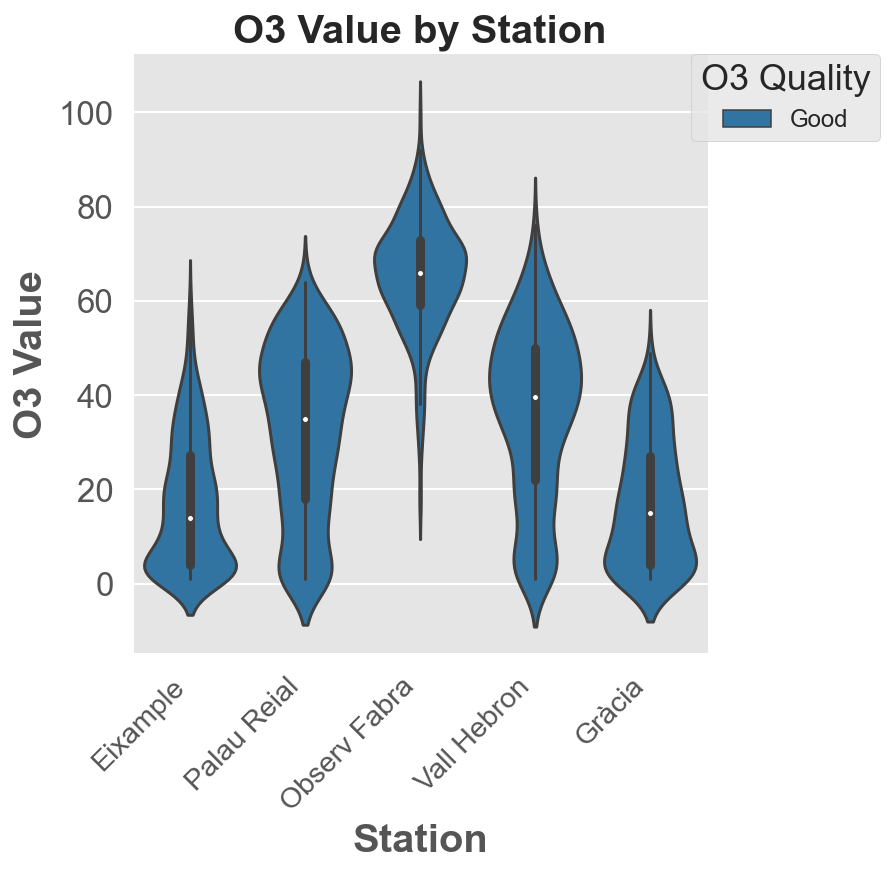

In [85]:
#O3 Value and Quality per Station
sns.catplot(x="station", y="o3_value", data=air, kind='violin', color='tab:blue', hue='o3_quality', legend=False, palette='tab10')
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)
plt.xlabel('Station', fontsize=20, fontweight='bold');
plt.ylabel('O3 Value', fontsize=20, fontweight='bold');
plt.title('O3 Value by Station', fontsize=20, fontweight='bold');
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), borderaxespad=0., fontsize=12).set_title('O3 Quality');

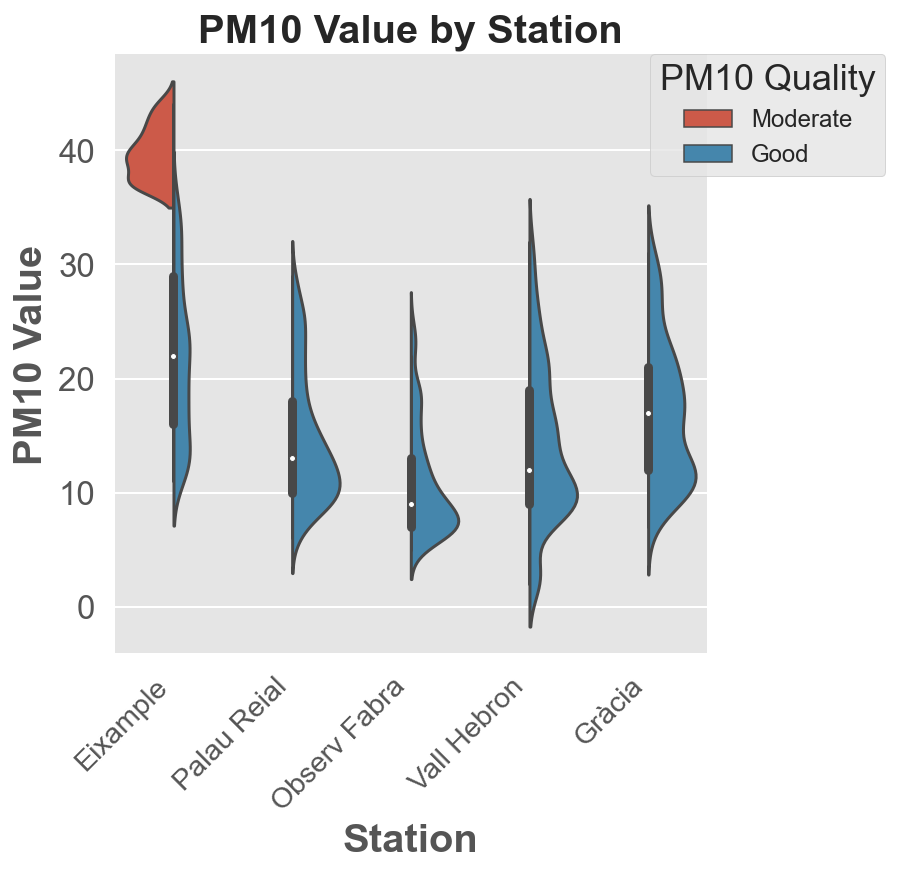

In [87]:
#pm10 value and quality per station
sns.catplot(x="station", y="pm10_value", data=air, hue='pm10_quality', kind='violin', split=True, legend=False, hue_order = ['Moderate', 'Good'])
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)
plt.xlabel('Station', fontsize=20, fontweight='bold');
plt.ylabel('PM10 Value', fontsize=20, fontweight='bold');
plt.title('PM10 Value by Station', fontsize=20, fontweight='bold');
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), borderaxespad=0., fontsize=12).set_title('PM10 Quality');

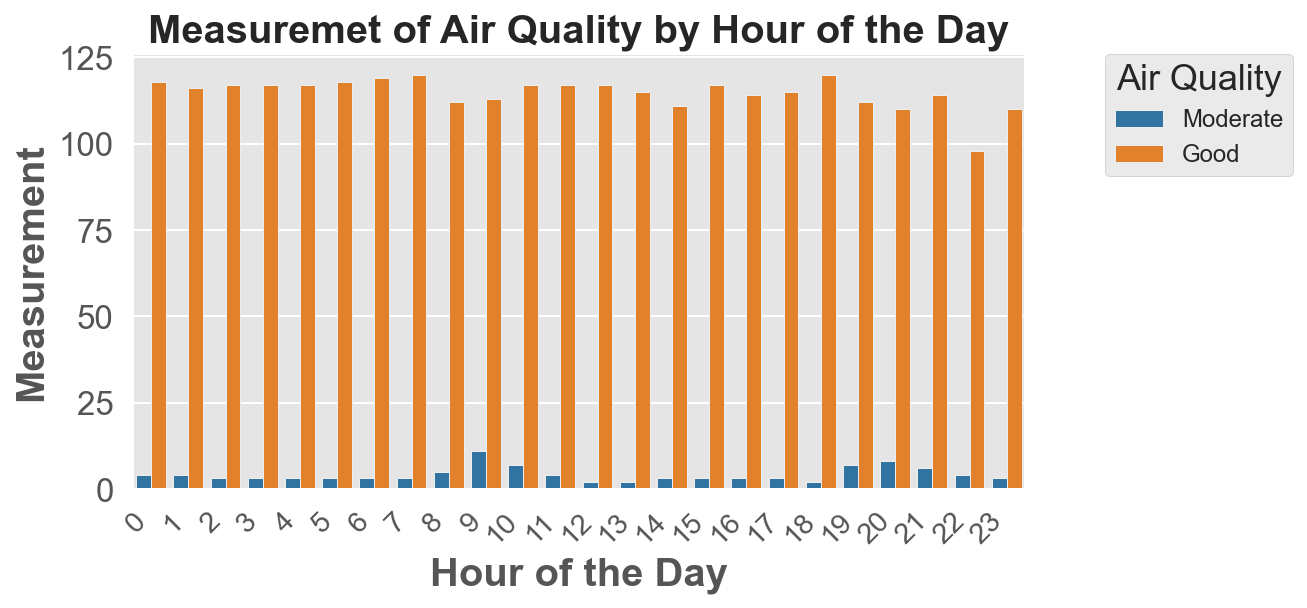

In [104]:
sns.countplot(x=air['date_time'].dt.hour, data=air, palette='tab10', hue='air_quality')
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)
plt.xlabel('Hour of the Day', fontsize=20, fontweight='bold');
plt.ylabel('Measurement', fontsize=20, fontweight='bold');
plt.title('Measuremet of Air Quality by Hour of the Day', fontsize=20, fontweight='bold');
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), borderaxespad=0., fontsize=12).set_title('Air Quality');

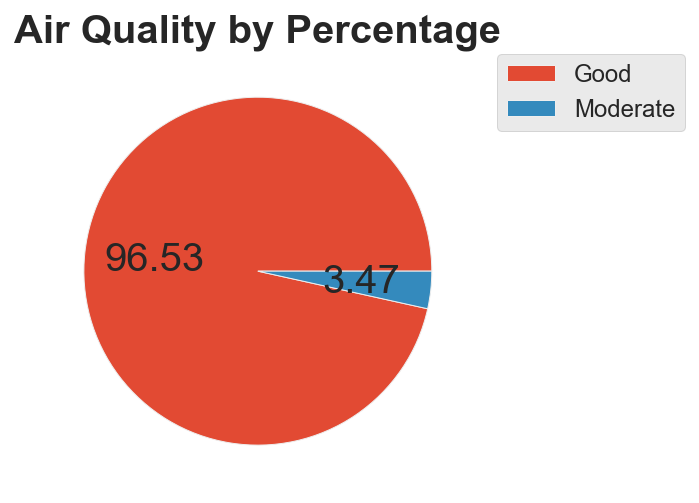

In [108]:
#pie plot of air quality
air.groupby('air_quality').size().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 20}, labels=["",""])
plt.title('Air Quality by Percentage', fontsize=20, fontweight='bold')
plt.ylabel('')
plt.legend(labels=['Good', 'Moderate'], loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=12);



In [112]:
# #check correlations between pm10, no3, and o3
# corr = air[['o3_value','no2_value','pm10_value']].corr()
# mask = np.zeros_like(corr, dtype=bool)
# mask[np.triu_indices_from(mask)] = True
# corr[mask] = np.nan
# (corr
#  .style
#  .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
#  .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
#  .set_precision(2))



C:\Users\Sultan\AppData\Local\Temp\ipykernel_4412\456907945.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr


,o3_value,no2_value,pm10_value
o3_value,nan,nan,nan
no2_value,-0.86,nan,nan
pm10_value,-0.37,0.49,nan


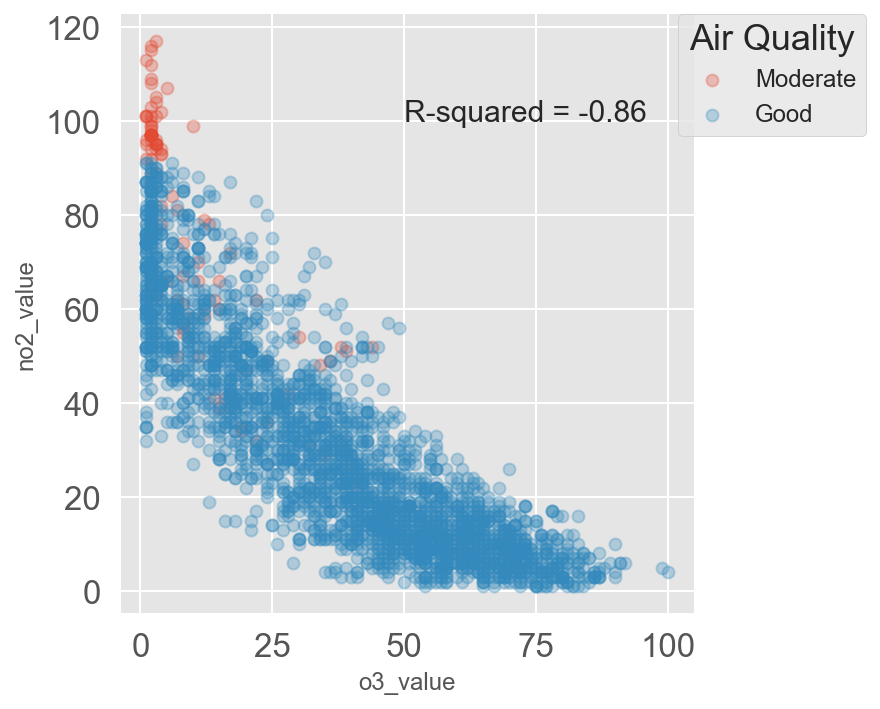

In [168]:
cor_o_n = air[['o3_value','no2_value']].corr()
str_cor_o_n = str(round(cor_o_n.iloc[0,1], 2))
sns.lmplot(x='o3_value', y='no2_value', data=air, hue='air_quality', fit_reg=False, scatter_kws={'alpha':0.3}, legend=False)
plt.annotate("R-squared = " + str_cor_o_n, xy=(50, 100), fontsize=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), borderaxespad=0., fontsize=12).set_title('Air Quality');


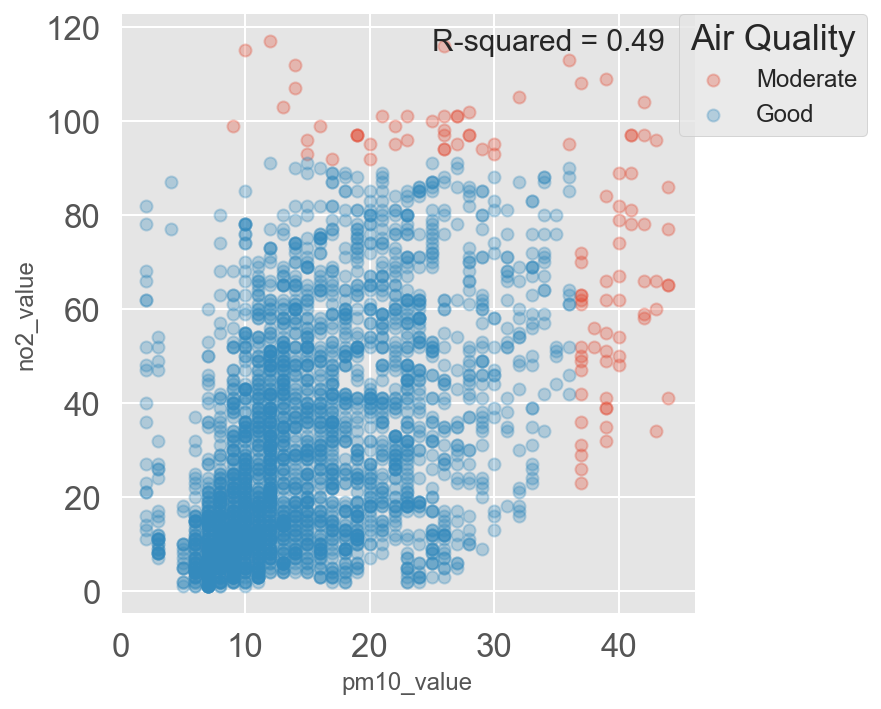

In [169]:
cor_p_n = air[['pm10_value','no2_value']].corr()
str_cor_p_n = str(round(cor_p_n.iloc[0,1], 2))
sns.lmplot(x='pm10_value', y='no2_value', data=air, hue='air_quality', fit_reg=False, scatter_kws={'alpha':0.3}, legend=False)
plt.annotate("R-squared = " + str_cor_p_n, xy=(25, 115), fontsize=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), borderaxespad=0., fontsize=12).set_title('Air Quality');


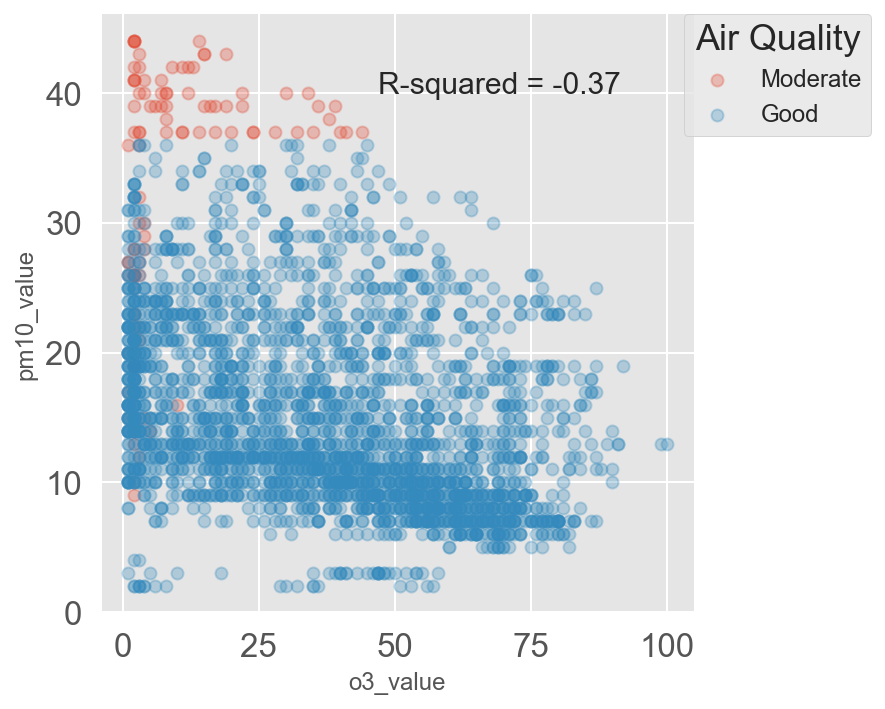

In [181]:
cor_o_p = air[['o3_value','pm10_value']].corr()
str_cor_o_p = str(round(cor_o_p.iloc[0,1], 2))
sns.lmplot(x='o3_value', y='pm10_value', data=air, hue='air_quality', fit_reg=False, scatter_kws={'alpha':0.3}, legend=False)
plt.annotate("R-squared = " + str_cor_o_p, xy=(47, 40), fontsize=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), borderaxespad=0., fontsize=12).set_title('Air Quality');